<a href="https://colab.research.google.com/github/KimYeEun0929/resnet50-image-classifier/blob/main/ResNet50%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 기본 셋업 및 모델 불러오기

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# 2. Colab에서 웹캠으로 사진 찍기

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  """
  Colab에서 웹캠으로 사진을 찍어 filename으로 저장
  저장된 파일 이름을 리턴
  """
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video')
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // 화면 크기 조정
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // capture 클릭 기다리기
      await new Promise((resolve) => capture.onclick = resolve);

      // 사진 캡처
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      // 카메라 종료
      stream.getVideoTracks()[0].stop();
      div.remove();

      // JPEG 인코딩
      return canvas.toDataURL('image/jpeg', quality);
    }
     ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))

  # dataURL -> 실제 이미지 데이터로 디코딩
  img_data = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(img_data)

  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


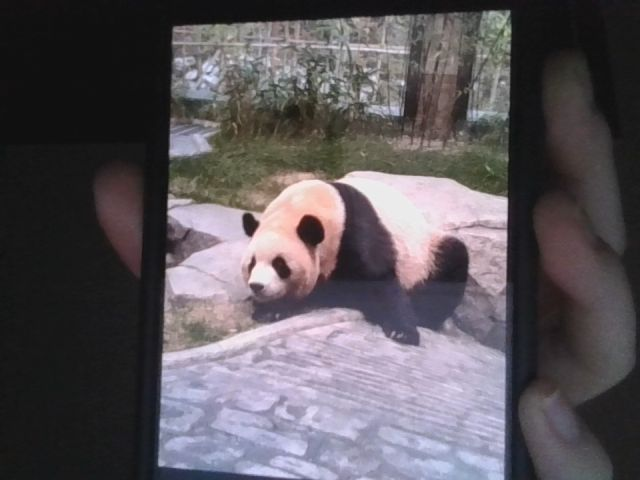

In [ ]:
from IPython.display import Image
try:
  # 웹캠으로 사진 찍기
  filename = take_photo() # 셀 실행하면 카메라가 뜨고, 캡처 후 photo.jpg로 저장
  print('Saved to {}'.format(filename))

  # 찍은 사진 보기
  display(Image(filename))

except Exception as err:
  # 웹캠이 없거나 접근 권한이 없다면 에러
  print(str(err))

# 3. 찍은 사진을 ResNet50으로 분류하기

In [ ]:
# 1. 이미지 로드 및 전처리
img = image.load_img(filename, target_size=(224, 224)) # ResNet50 입력 크기
x = image.img_to_array(img)                            # (224, 224, 3)
x = np.expand_dims(x, axis=0)                          # (1, 224, 224, 3) 배치 차원 추가
x = preprocess_input(x)                                # ResNet50 전용 전처리

# 2. 예측
preds = model.predict(x)
print('Predicted', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted [('n02510455', 'giant_panda', np.float32(0.5589953)), ('n02108915', 'French_bulldog', np.float32(0.2548035)), ('n02395406', 'hog', np.float32(0.070541255))]
